# EXP1 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('dataset.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      40    1   2       140   289    0        0      172      0      0.0   
1      49    0   3       160   180    0        0      156      0      1.0   
2      37    1   2       130   283    0        1       98      0      0.0   
3      48    0   4       138   214    0        0      108      1      1.5   
4      54    1   3       150   195    0        0      122      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1185   45    1   1       110   264    0        0      132      0      1.2   
1186   68    1   4       144   193    1        0      141      0      3.4   
1187   57    1   4       130   131    0        0      115      1      1.2   
1188   57    0   2       130   236    0        2      174      0      0.0   
1189   38    1   3       138   175    0        0      173      0      0.0   

      slope  target  
0         1       0  
1         2       1  
2         1       0  
3         2       1  
4         1       0  
...     ...     ...  
1185      2       1  
1186      2       1  
1187      2       1  
1188      2       1  
1189      1       0  

[1190 rows x 12 columns]

In [3]:

df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   40    1   2       140   289    0        0      172      0      0.0      1   
1   49    0   3       160   180    0        0      156      0      1.0      2   
2   37    1   2       130   283    0        1       98      0      0.0      1   
3   48    0   4       138   214    0        0      108      1      1.5      2   
4   54    1   3       150   195    0        0      122      0      0.0      1   

   target  
0       0  
1       1  
2       0  
3       1  
4       0

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1185   45    1   1       110   264    0        0      132      0      1.2   
1186   68    1   4       144   193    1        0      141      0      3.4   
1187   57    1   4       130   131    0        0      115      1      1.2   
1188   57    0   2       130   236    0        2      174      0      0.0   
1189   38    1   3       138   175    0        0      173      0      0.0   

      slope  target  
1185      2       1  
1186      2       1  
1187      2       1  
1188      2       1  
1189      1       0

In [5]:
df.shape

(1190, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   sex       1190 non-null   int64  
 2   cp        1190 non-null   int64  
 3   trestbps  1190 non-null   int64  
 4   chol      1190 non-null   int64  
 5   fbs       1190 non-null   int64  
 6   restecg   1190 non-null   int64  
 7   thalach   1190 non-null   int64  
 8   exang     1190 non-null   int64  
 9   oldpeak   1190 non-null   float64
 10  slope     1190 non-null   int64  
 11  target    1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
df.describe()

age          sex           cp     trestbps         chol  \
count  1190.000000  1190.000000  1190.000000  1190.000000  1190.000000   
mean     53.720168     0.763866     3.232773   132.153782   210.363866   
std       9.358203     0.424884     0.935480    18.368823   101.420489   
min      28.000000     0.000000     1.000000     0.000000     0.000000   
25%      47.000000     1.000000     3.000000   120.000000   188.000000   
50%      54.000000     1.000000     4.000000   130.000000   229.000000   
75%      60.000000     1.000000     4.000000   140.000000   269.750000   
max      77.000000     1.000000     4.000000   200.000000   603.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1190.000000  1190.000000  1190.000000  1190.000000  1190.000000   
mean      0.213445     0.698319   139.732773     0.387395     0.922773   
std       0.409912     0.870359    25.517636     0.487360     1.086337   
min       0.000000     0.000000    60.000000     0.000000    -2.600000   
25%       0.000000     0.000000   121.000000     0.000000     0.000000   
50%       0.000000     0.000000   140.500000     0.000000     0.600000   
75%       0.000000     2.000000   160.000000     1.000000     1.600000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope       target  
count  1190.000000  1190.000000  
mean      1.624370     0.528571  
std       0.610459     0.499393  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       2.000000     1.000000  
75%       2.000000     1.000000  
max       3.000000     1.000000

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

In [9]:
X = df.drop('target', axis=1)
y = df['target']


In [10]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope
0   40    1   2       140   289    0        0      172      0      0.0      1
1   49    0   3       160   180    0        0      156      0      1.0      2
2   37    1   2       130   283    0        1       98      0      0.0      1
3   48    0   4       138   214    0        0      108      1      1.5      2
4   54    1   3       150   195    0        0      122      0      0.0      1

In [11]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: target, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)



In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



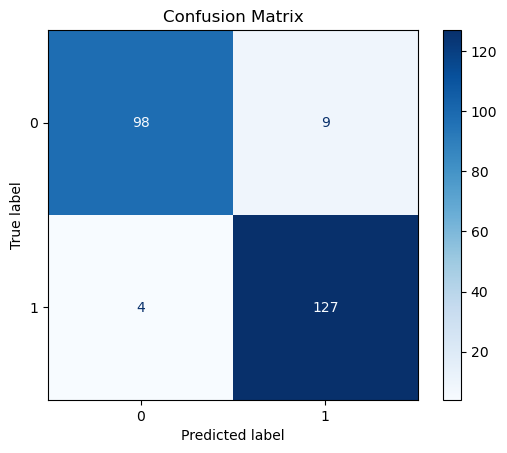

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
